# analysis_d22a

### Purpose
Using Monte Carlo Drift Correction (MCDC), analyse data produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb), including production of figures and tables.

### Input data
NetCDF files in [data/](https://github.com/grandey/d22a-mcdc/tree/main/data/) (produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb)), each containing a global mean time series for a given variable, ESM variant, and CMIP6 scenario.

### Output files written
Figures (in [figs_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/figs_d22a)) and tables (in [tables_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/tables_d22a)).

### Author
BSG, 2023.

In [1]:
import d22a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

matplotlib : 3.7.2
numpy      : 1.25.1
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Print constants relating to reference period, default ESM, and number of samples
for const in [d22a.REF_YRS, d22a.REF_STR, d22a.DEF_ESM, d22a.SAMPLE_N]:
    print(const)

[1850, 1859]
1850s
UKESM1-0-LL_r1i1p1f2
1500


In [5]:
# Read all model data into cache at start
_ = d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

## Main manuscript

Written fig01.pdf (0.06 MB)
Written fig01.png (1.11 MB)


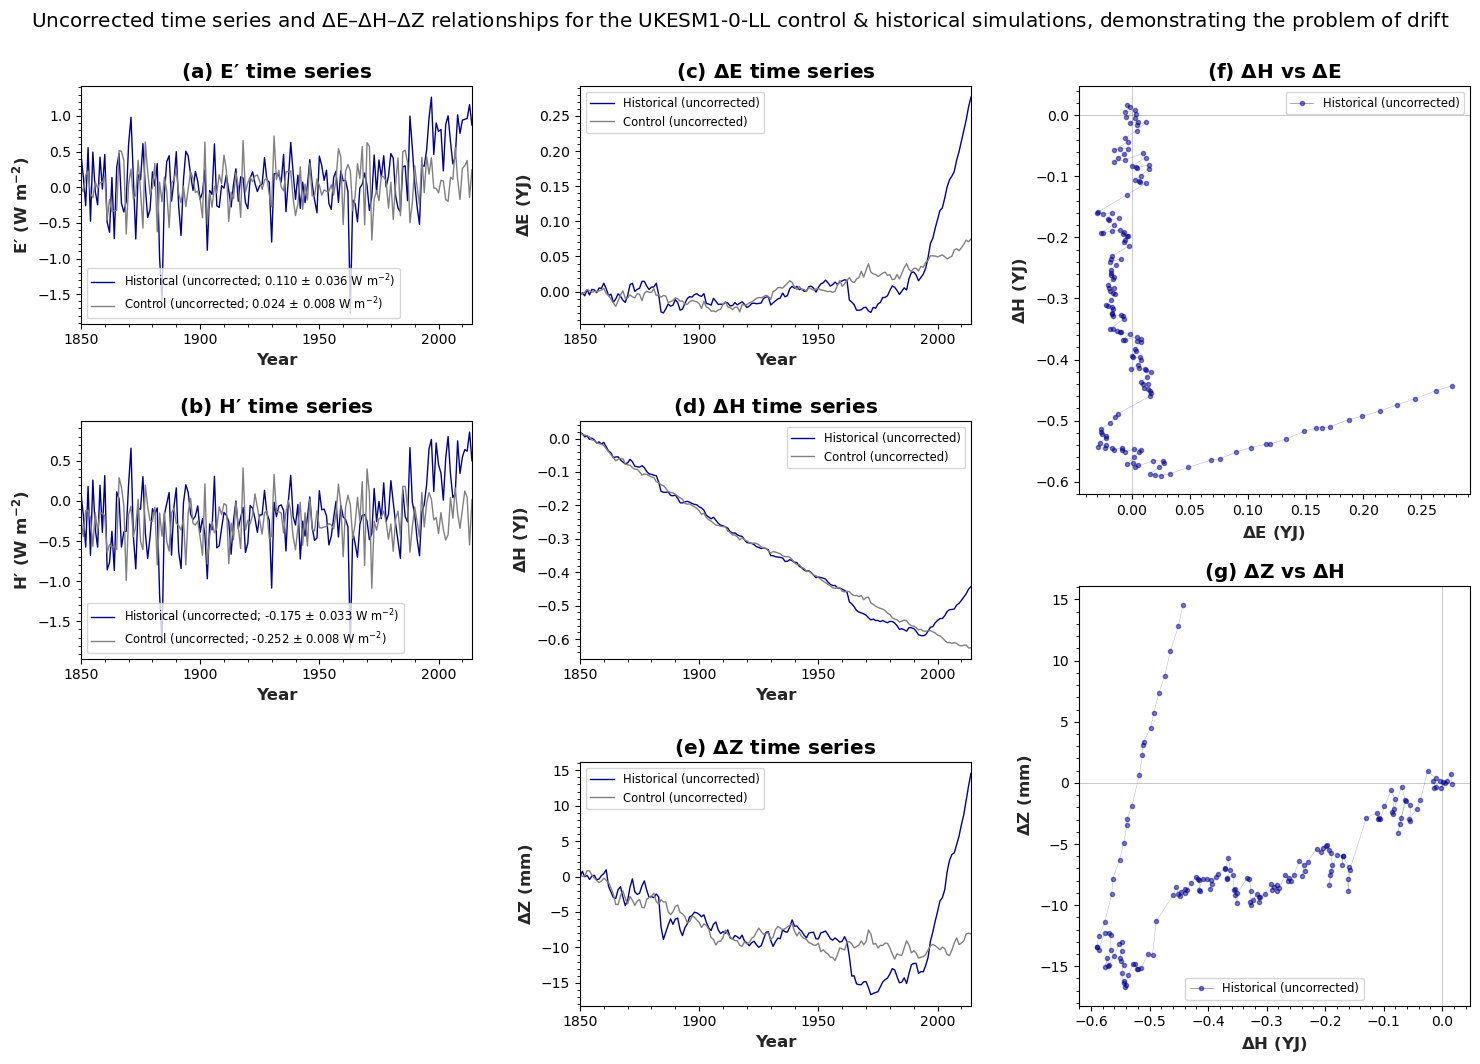

In [6]:
# Demonstrate problem of drift
fig = d22a.composite_problem_of_drift()
_ = d22a.name_save_fig(fig, fso='f')

Written fig02.pdf (36.89 MB)
Written fig02.png (2.59 MB)


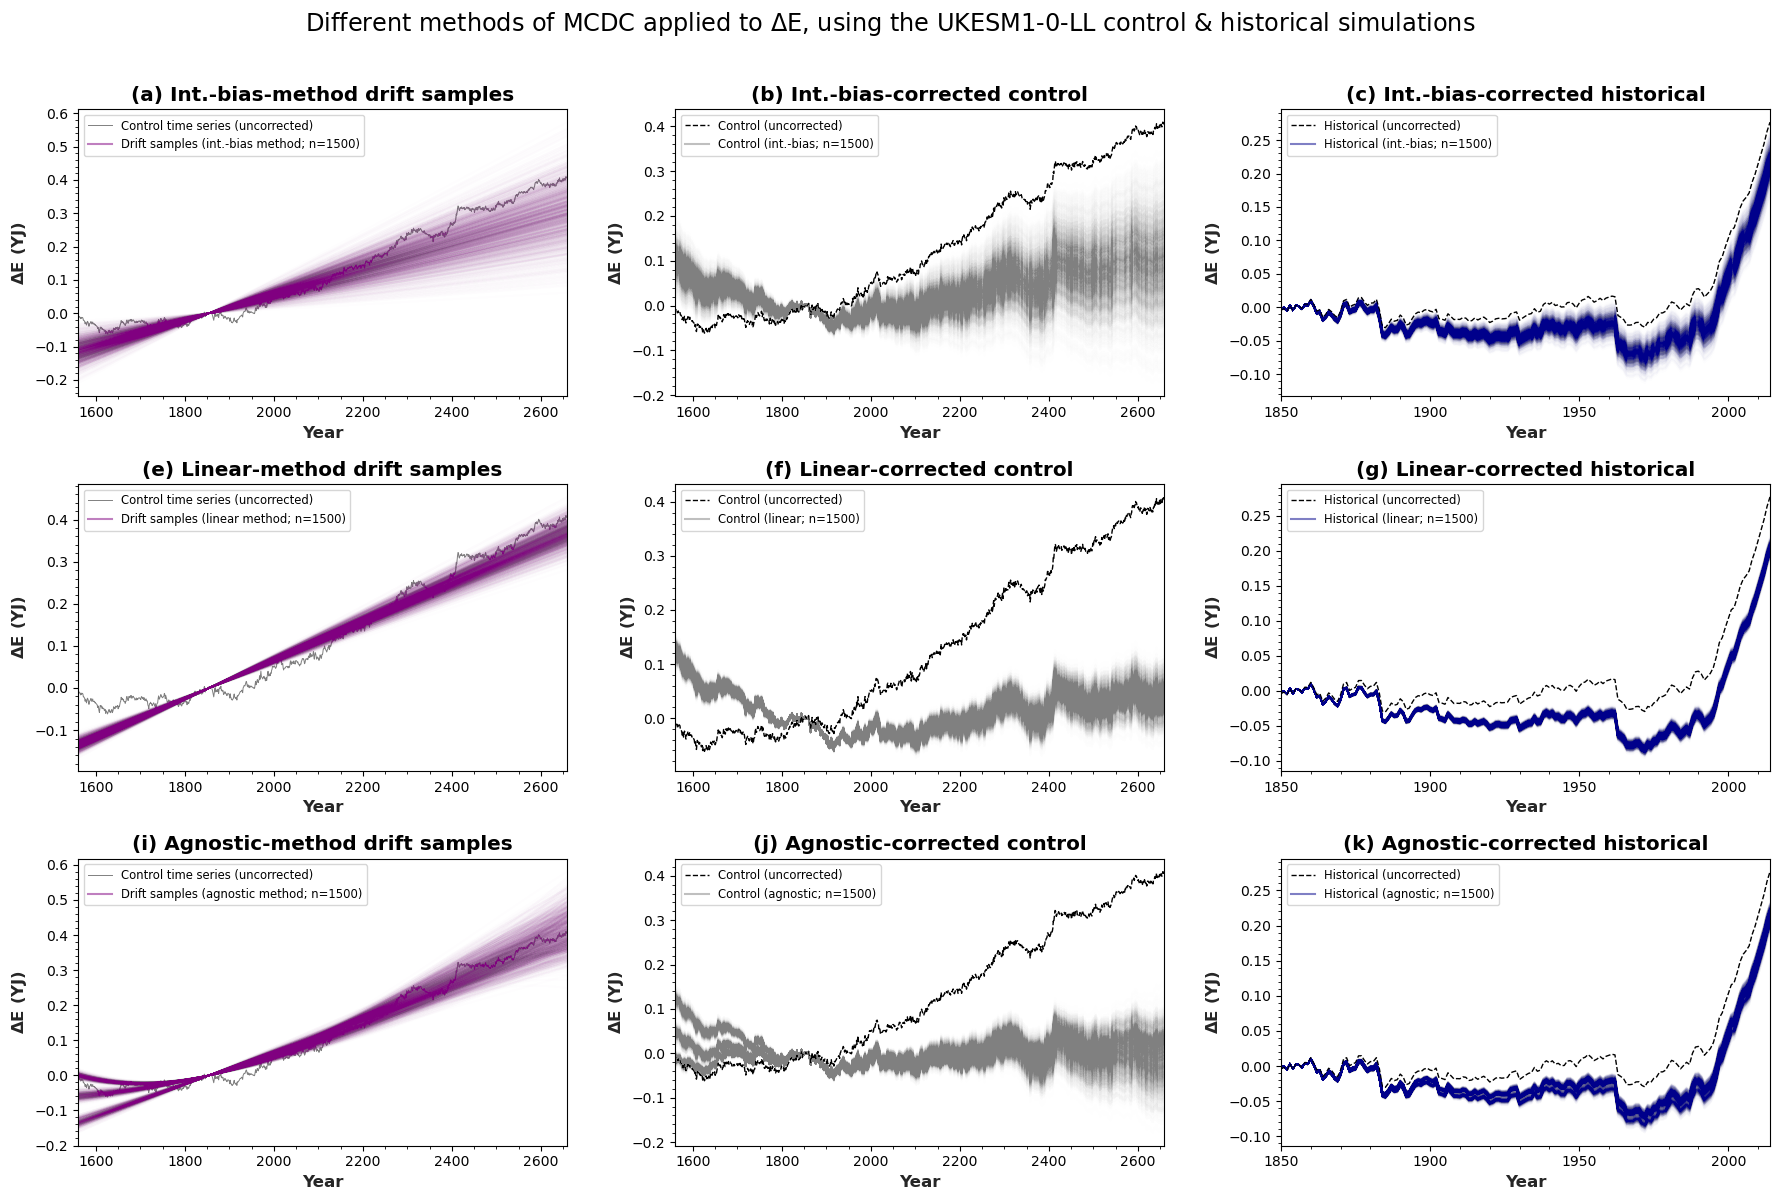

In [ ]:
# Compare methods applied to E
fig = d22a.composite_compare_methods_timeseries(variable='E')
_ = d22a.name_save_fig(fig, fso='f')

Written fig03.pdf (0.03 MB)
Written fig03.png (0.19 MB)
Written fig04.pdf (0.03 MB)
Written fig04.png (0.19 MB)


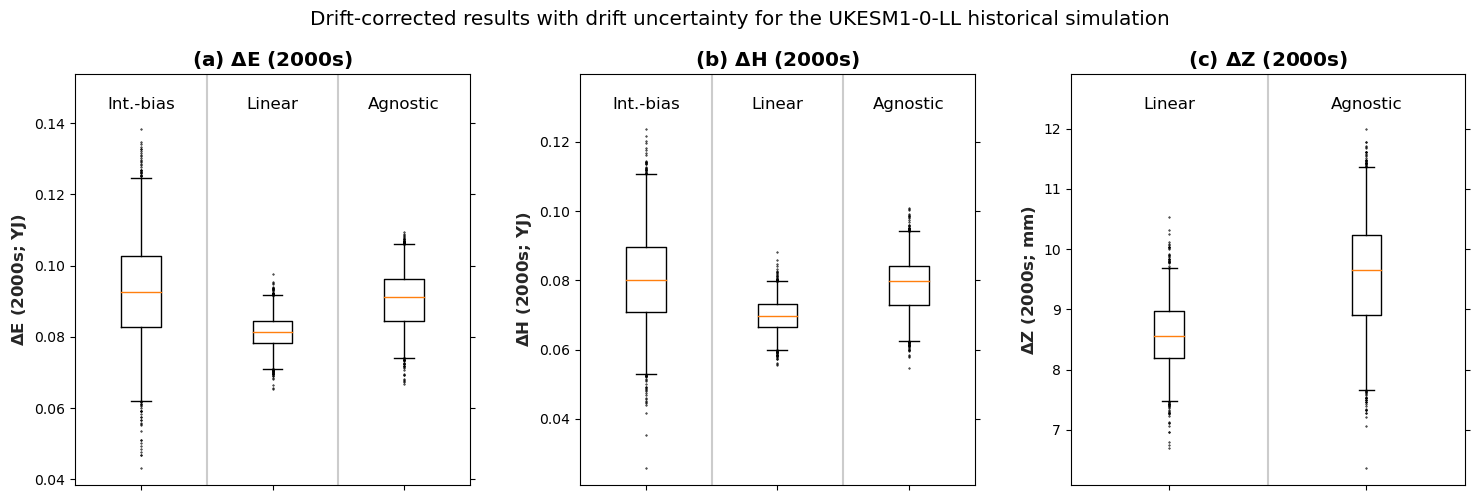

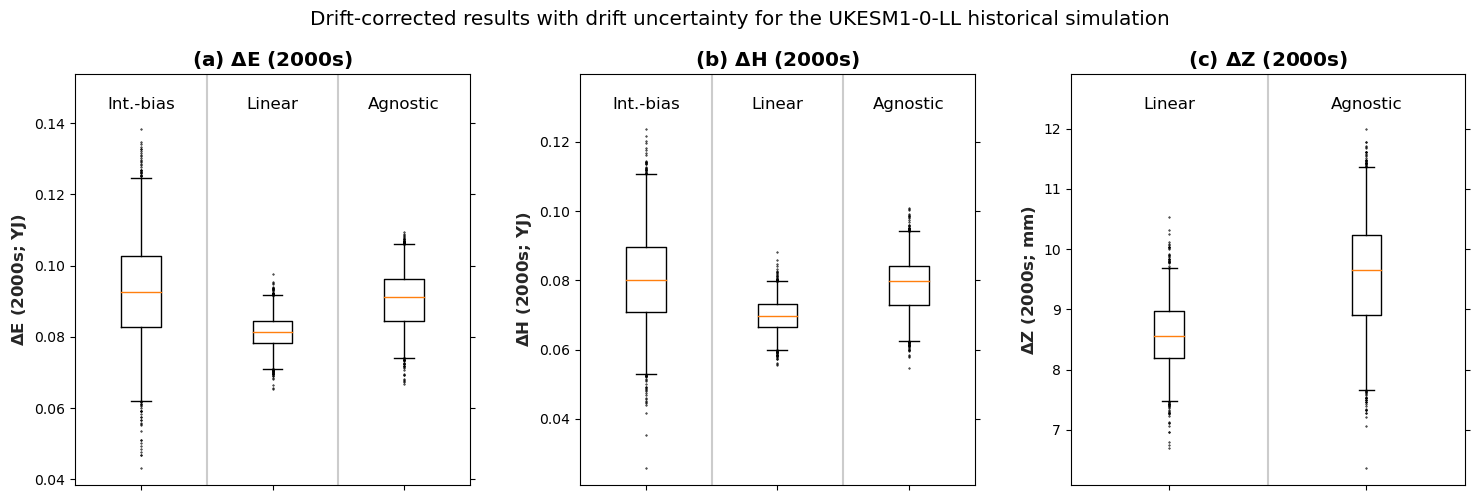

In [8]:
# Boxplots of E, H, Z for 2000s and 2050s
for target_decade in ['2000s', '2050s']:
    fig = d22a.composite_boxplots(variables=('E', 'H', 'Z'), target_decade='2000s')
    _ = d22a.name_save_fig(fig, fso='f')

In [9]:
# Summary table (across ensemble)
tex_str = d22a.get_summary_tex()  # Latex version
_ = d22a.name_save_table(tex_str, fso='f')  # save Latex version
summary_df = d22a.get_summary_df(target_decade='2050s')  # show DataFrame version
summary_df

Written table_01.tex


$\Delta E$ (2050s; YJ) $\Delta H$ (2050s; YJ)  \
Drift uncertainty Int.-bias    0.103 (0.046–0.206)    0.103 (0.043–0.204)   
                  Linear       0.028 (0.006–0.084)    0.028 (0.005–0.084)   
                  Agnostic     0.127 (0.036–0.252)    0.131 (0.039–0.324)   
Other uncertainty Model        0.745 (0.638–0.900)    0.780 (0.723–0.887)   
                  Scenario     0.177 (0.104–0.304)    0.167 (0.086–0.290)   

                            $\Delta Z$ (2050s; mm)    $\eta$ (unitless)  \
Drift uncertainty Int.-bias                    NaN  0.033 (0.012–0.070)   
                  Linear            3.4 (0.7–10.8)  0.009 (0.002–0.029)   
                  Agnostic         15.7 (4.4–35.2)  0.059 (0.007–0.154)   
Other uncertainty Model           82.7 (73.9–98.1)  0.171 (0.162–0.181)   
                  Scenario        21.9 (12.1–37.9)  0.021 (0.006–0.079)   

                            $\epsilon$ (mm YJ$^{-1}$)  
Drift uncertainty Int.-bias                       NaN  
                  Linear                1.1 (0.2–3.4)  
                  Agnostic             7.4 (0.8–21.1)  
Other uncertainty Model              12.2 (11.5–13.3)  
                  Scenario              7.4 (4.1–9.9)

/Users/benjamin/github/d22a-mcdc/d22a.py:1199: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(fig_path)


Written fig05.pdf (14.94 MB)


/Users/benjamin/github/d22a-mcdc/d22a.py:1199: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(fig_path)


Written fig05.png (1.16 MB)


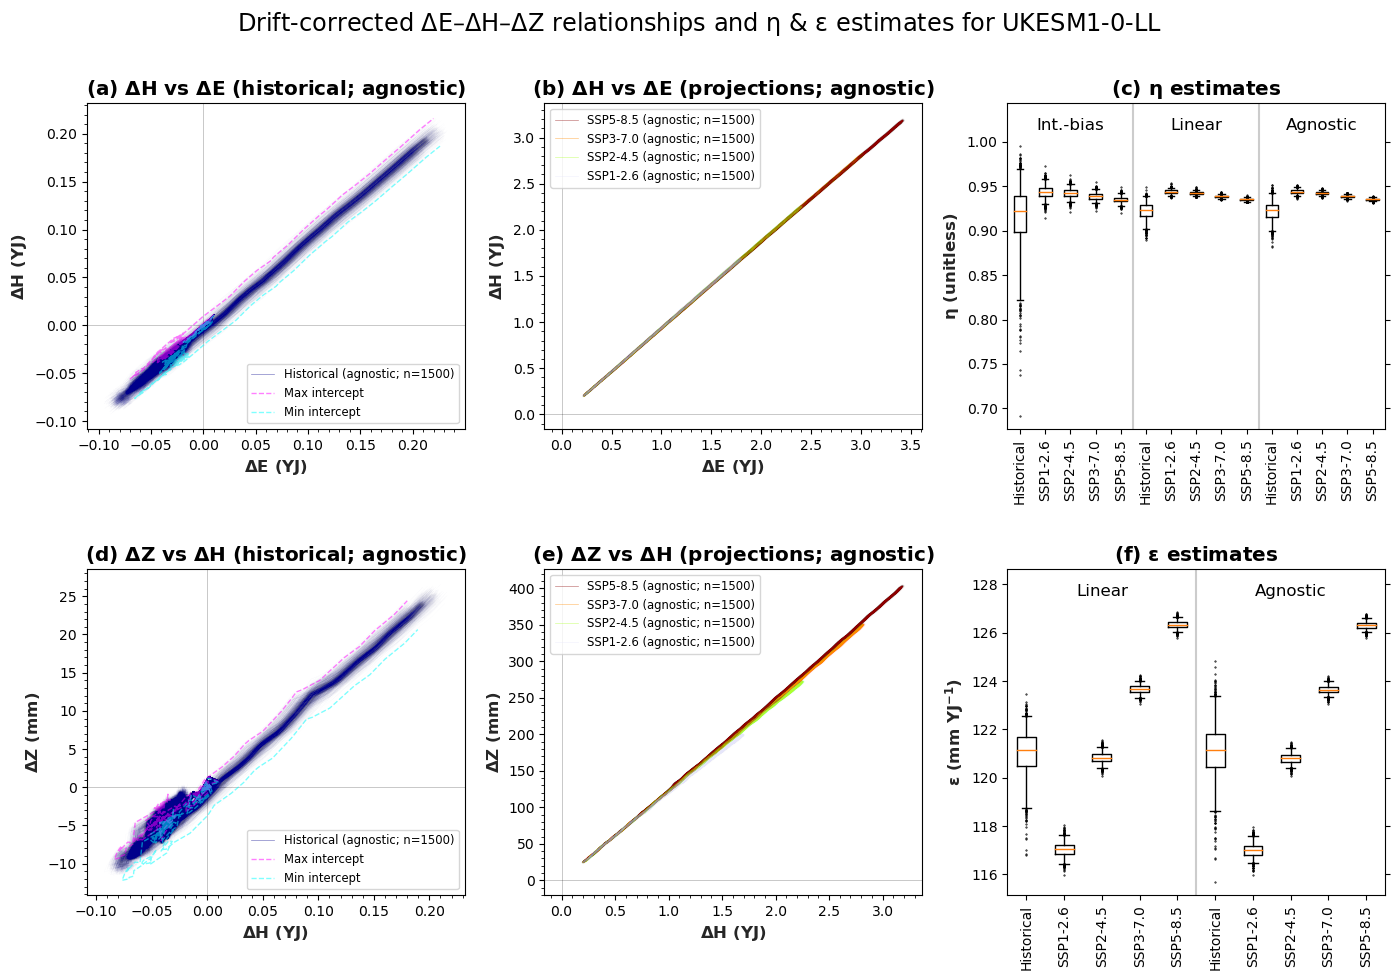

In [10]:
# Relationships, eta, eps
fig = d22a.composite_rel_eta_eps_demo()
_ = d22a.name_save_fig(fig, fso='f')

## Supplement

In [11]:
# Table containing model information
tex_str = d22a.get_esm_info_tex()
_ = d22a.name_save_table(tex_str, fso='s')  # save
# Show corresponding DataFrame in notebook
info_df = d22a.get_esm_info_df()
info_df

Written table_S01.tex


,Variant,Control length (yr),Calendar,Further information URL
Model,,,,
ACCESS-CM2,r1i1p1f1,500,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARC...
ACCESS-ESM1-5,r1i1p1f1,1000,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACC...
CMCC-CM2-SR5,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CMCC-ESM2,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CNRM-CM6-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CNRM-ESM2-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CanESM5,r1i1p1f1,1000,365 day,https://furtherinfo.es-doc.org/CMIP6.CCCma.Can...
EC-Earth3-Veg-LR,r1i1p1f1,501,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
IPSL-CM6A-LR,r1i1p1f1,1000,gregorian,https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL...


Written s01.pdf (26.52 MB)
Written s01.png (1.13 MB)
Written s02.pdf (23.36 MB)
Written s02.png (1.47 MB)


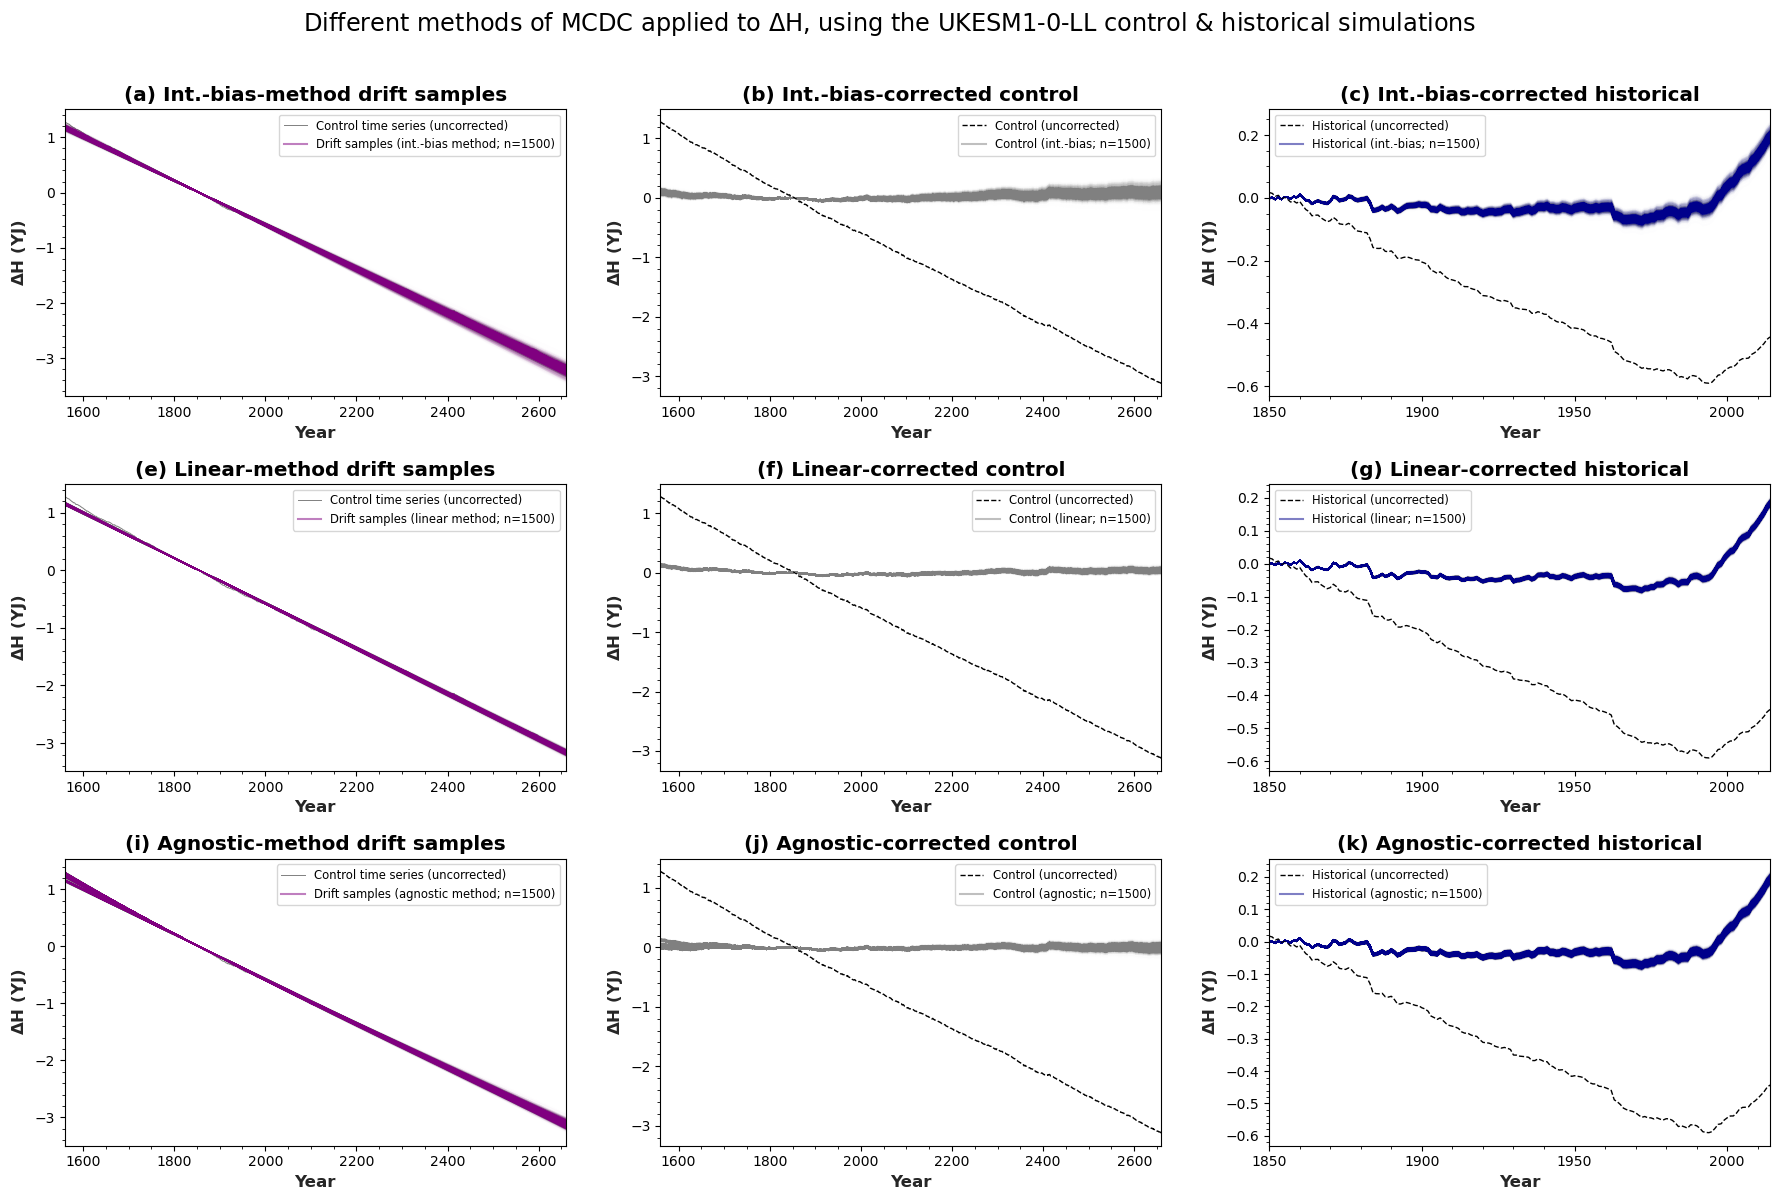

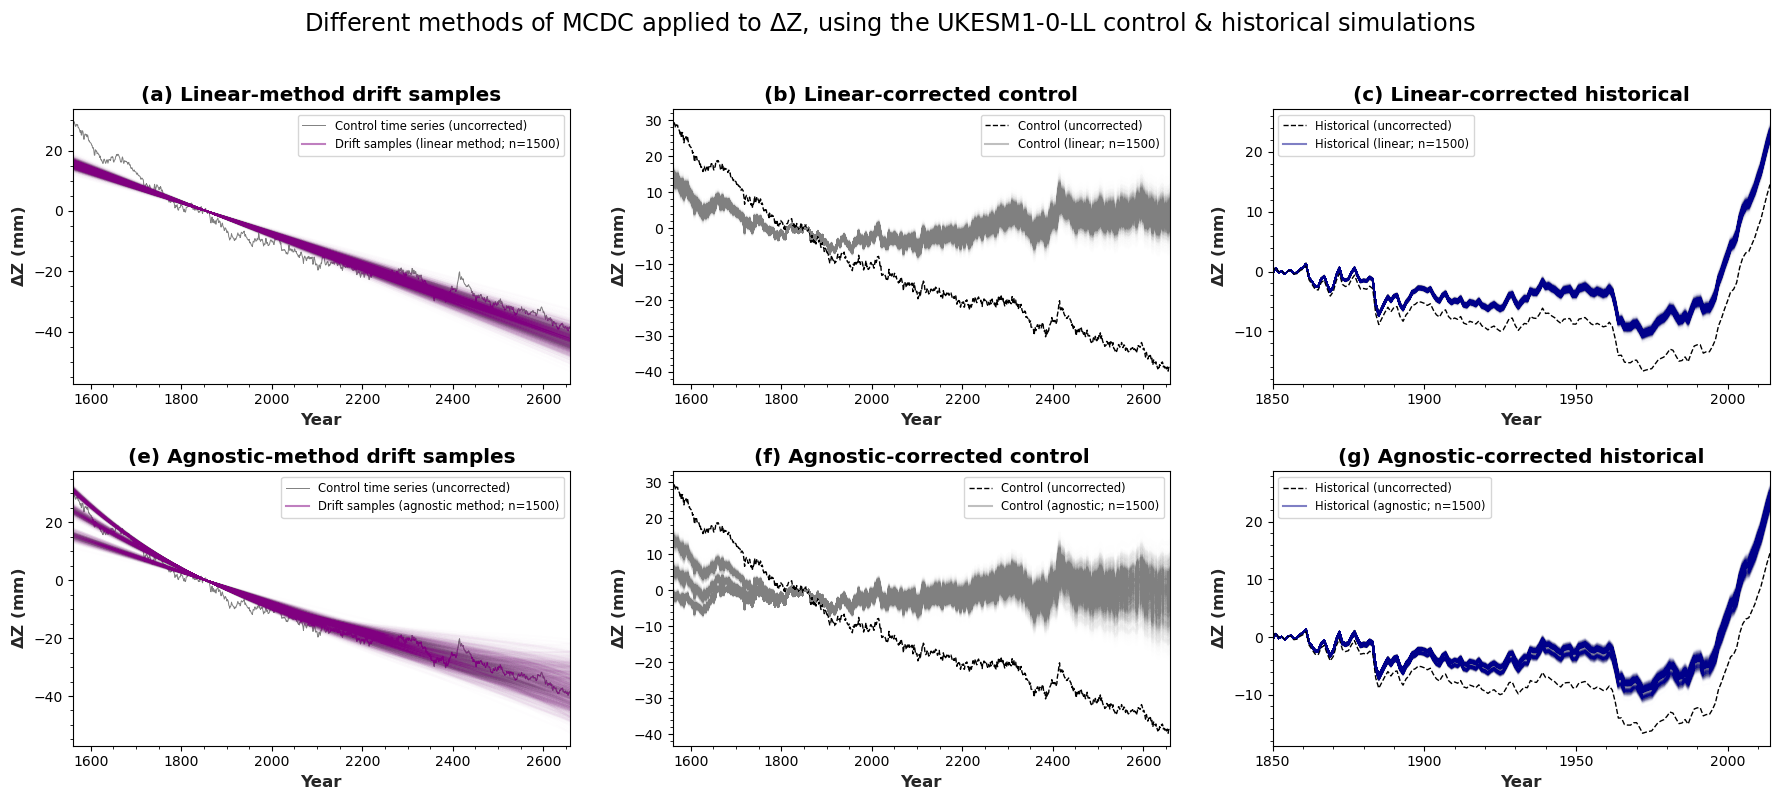

In [12]:
# Compare methods applied to H & Z
for variable in ['H', 'Z']:
    fig = d22a.composite_compare_methods_timeseries(variable=variable)
    _ = d22a.name_save_fig(fig, fso='s')

Written s03.pdf (0.18 MB)
Written s03.png (1.01 MB)
Written table_S02.tex
E (2050s)                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                   0.108  0.044    0.136               NaN    0.170
ACCESS-ESM1-5                0.050  0.006    0.036               NaN    0.213
CMCC-CM2-SR5                 0.206  0.084    0.179               NaN    0.184
CMCC-ESM2                    0.172  0.078    0.211               NaN    0.201
CNRM-CM6-1                   0.125  0.028    0.200               NaN    0.161
CNRM-ESM2-1                  0.153  0.030    0.249               NaN    0.104
CanESM5                      0.046  0.012    0.066               NaN    0.304
EC-Earth3-Veg-LR             0.151  0.036    0.252               NaN    0.160
IPSL-CM6A-LR                 0.105  0.023    0.083               NaN    0.195
MIROC6                       0.057  0.010    0.089        

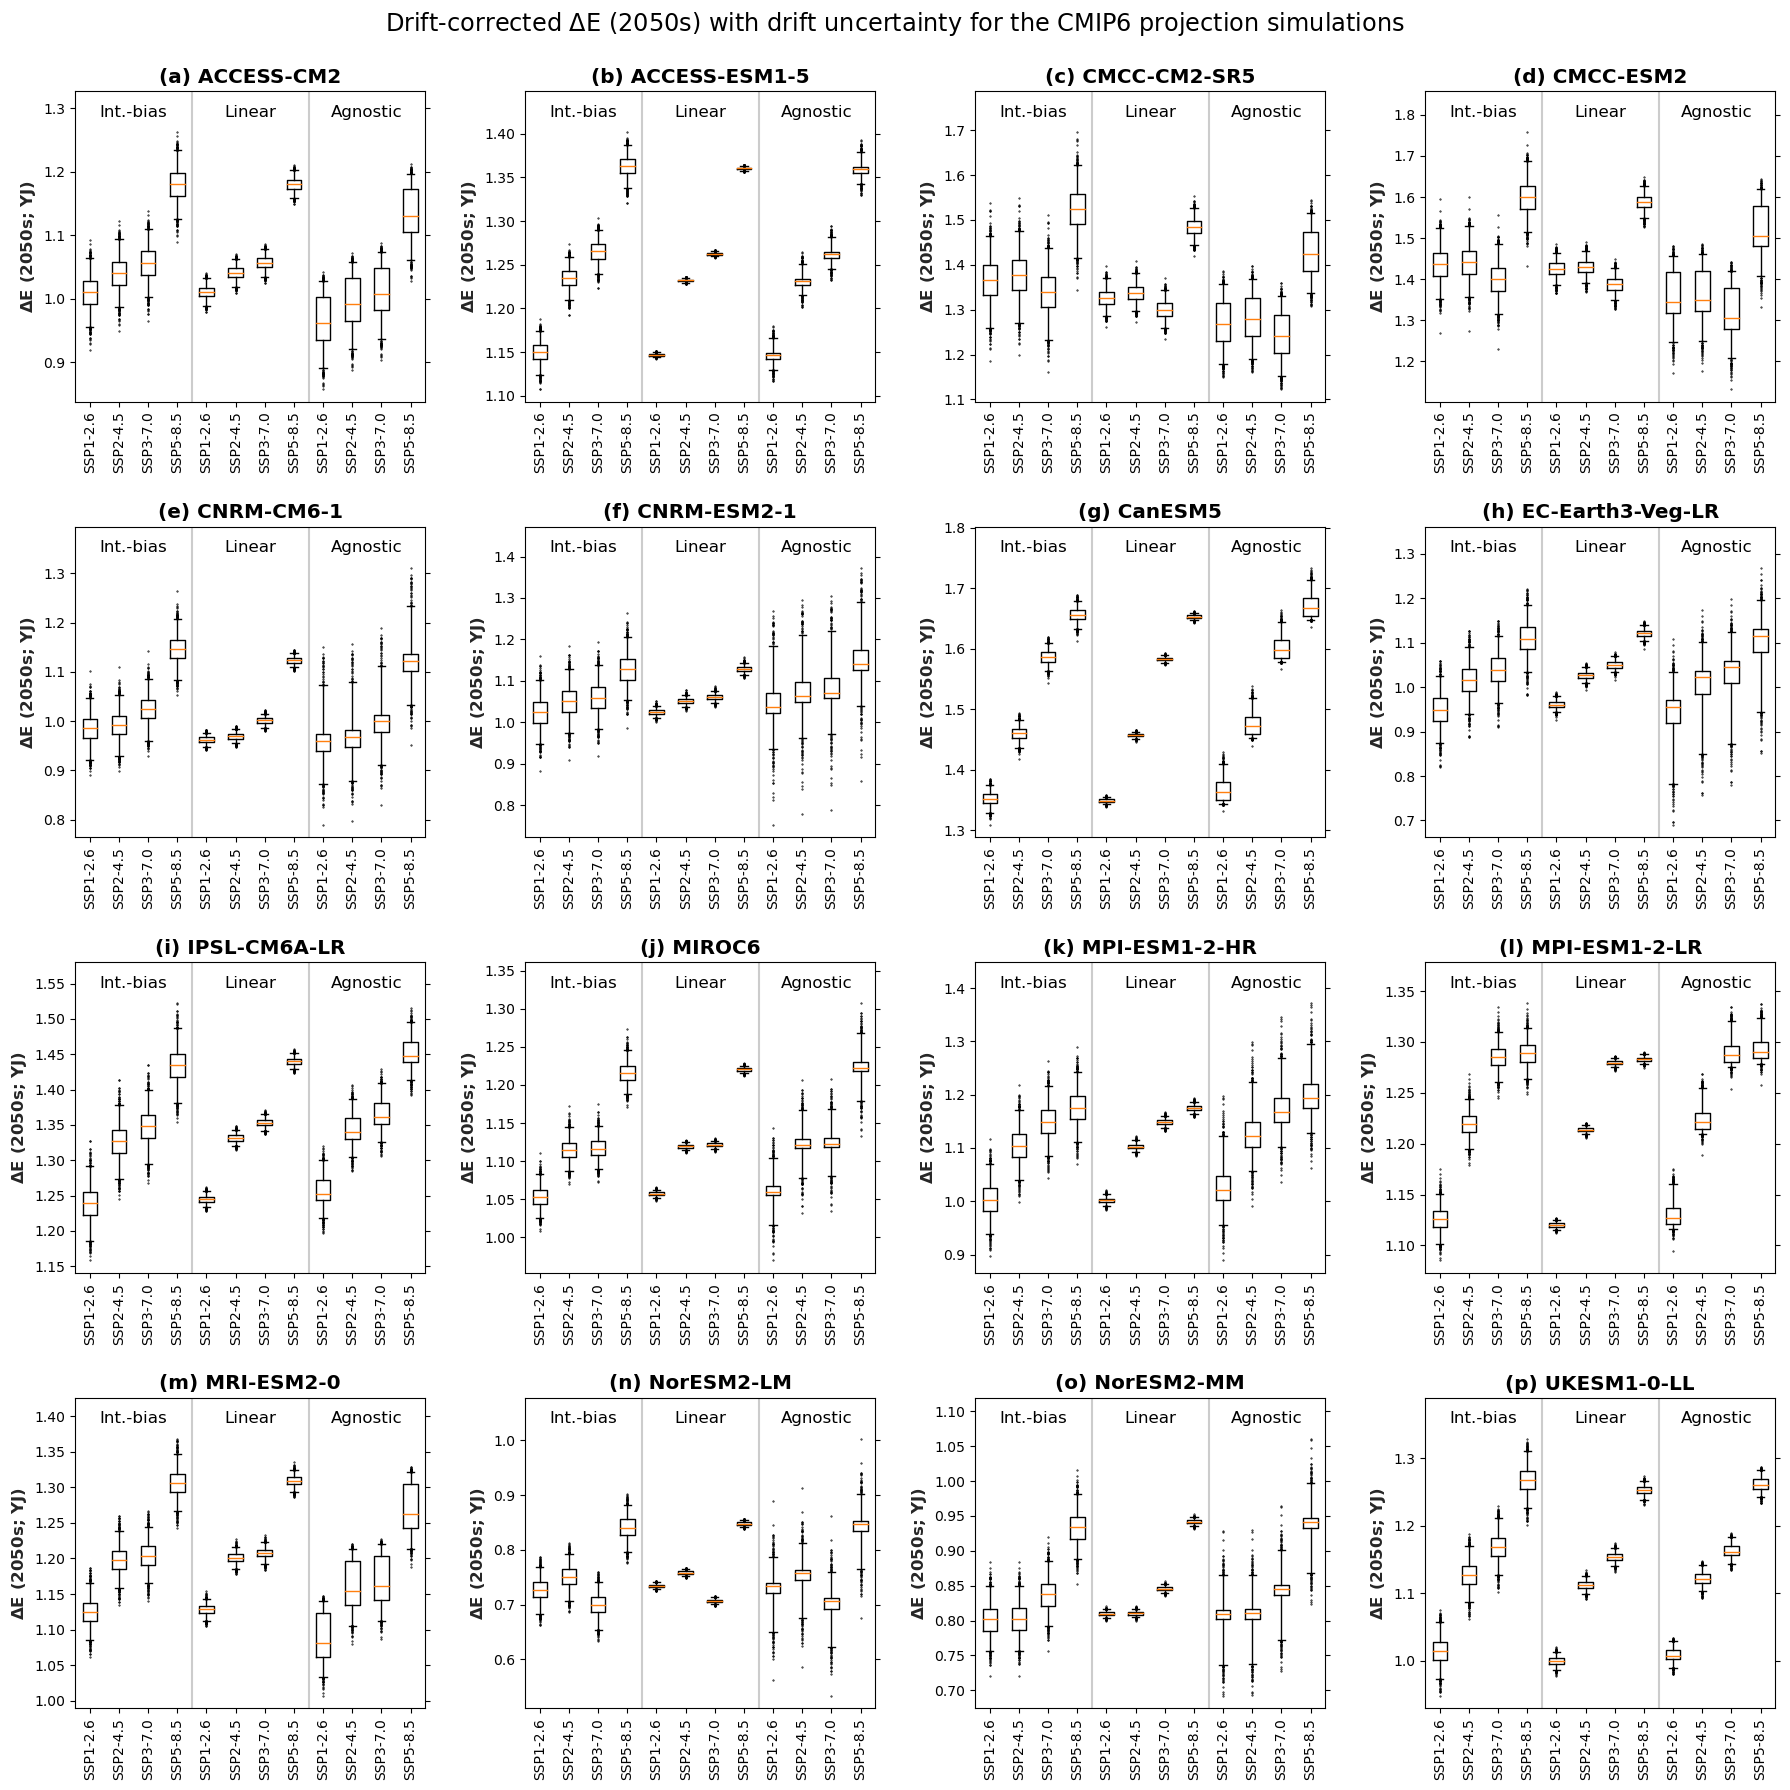

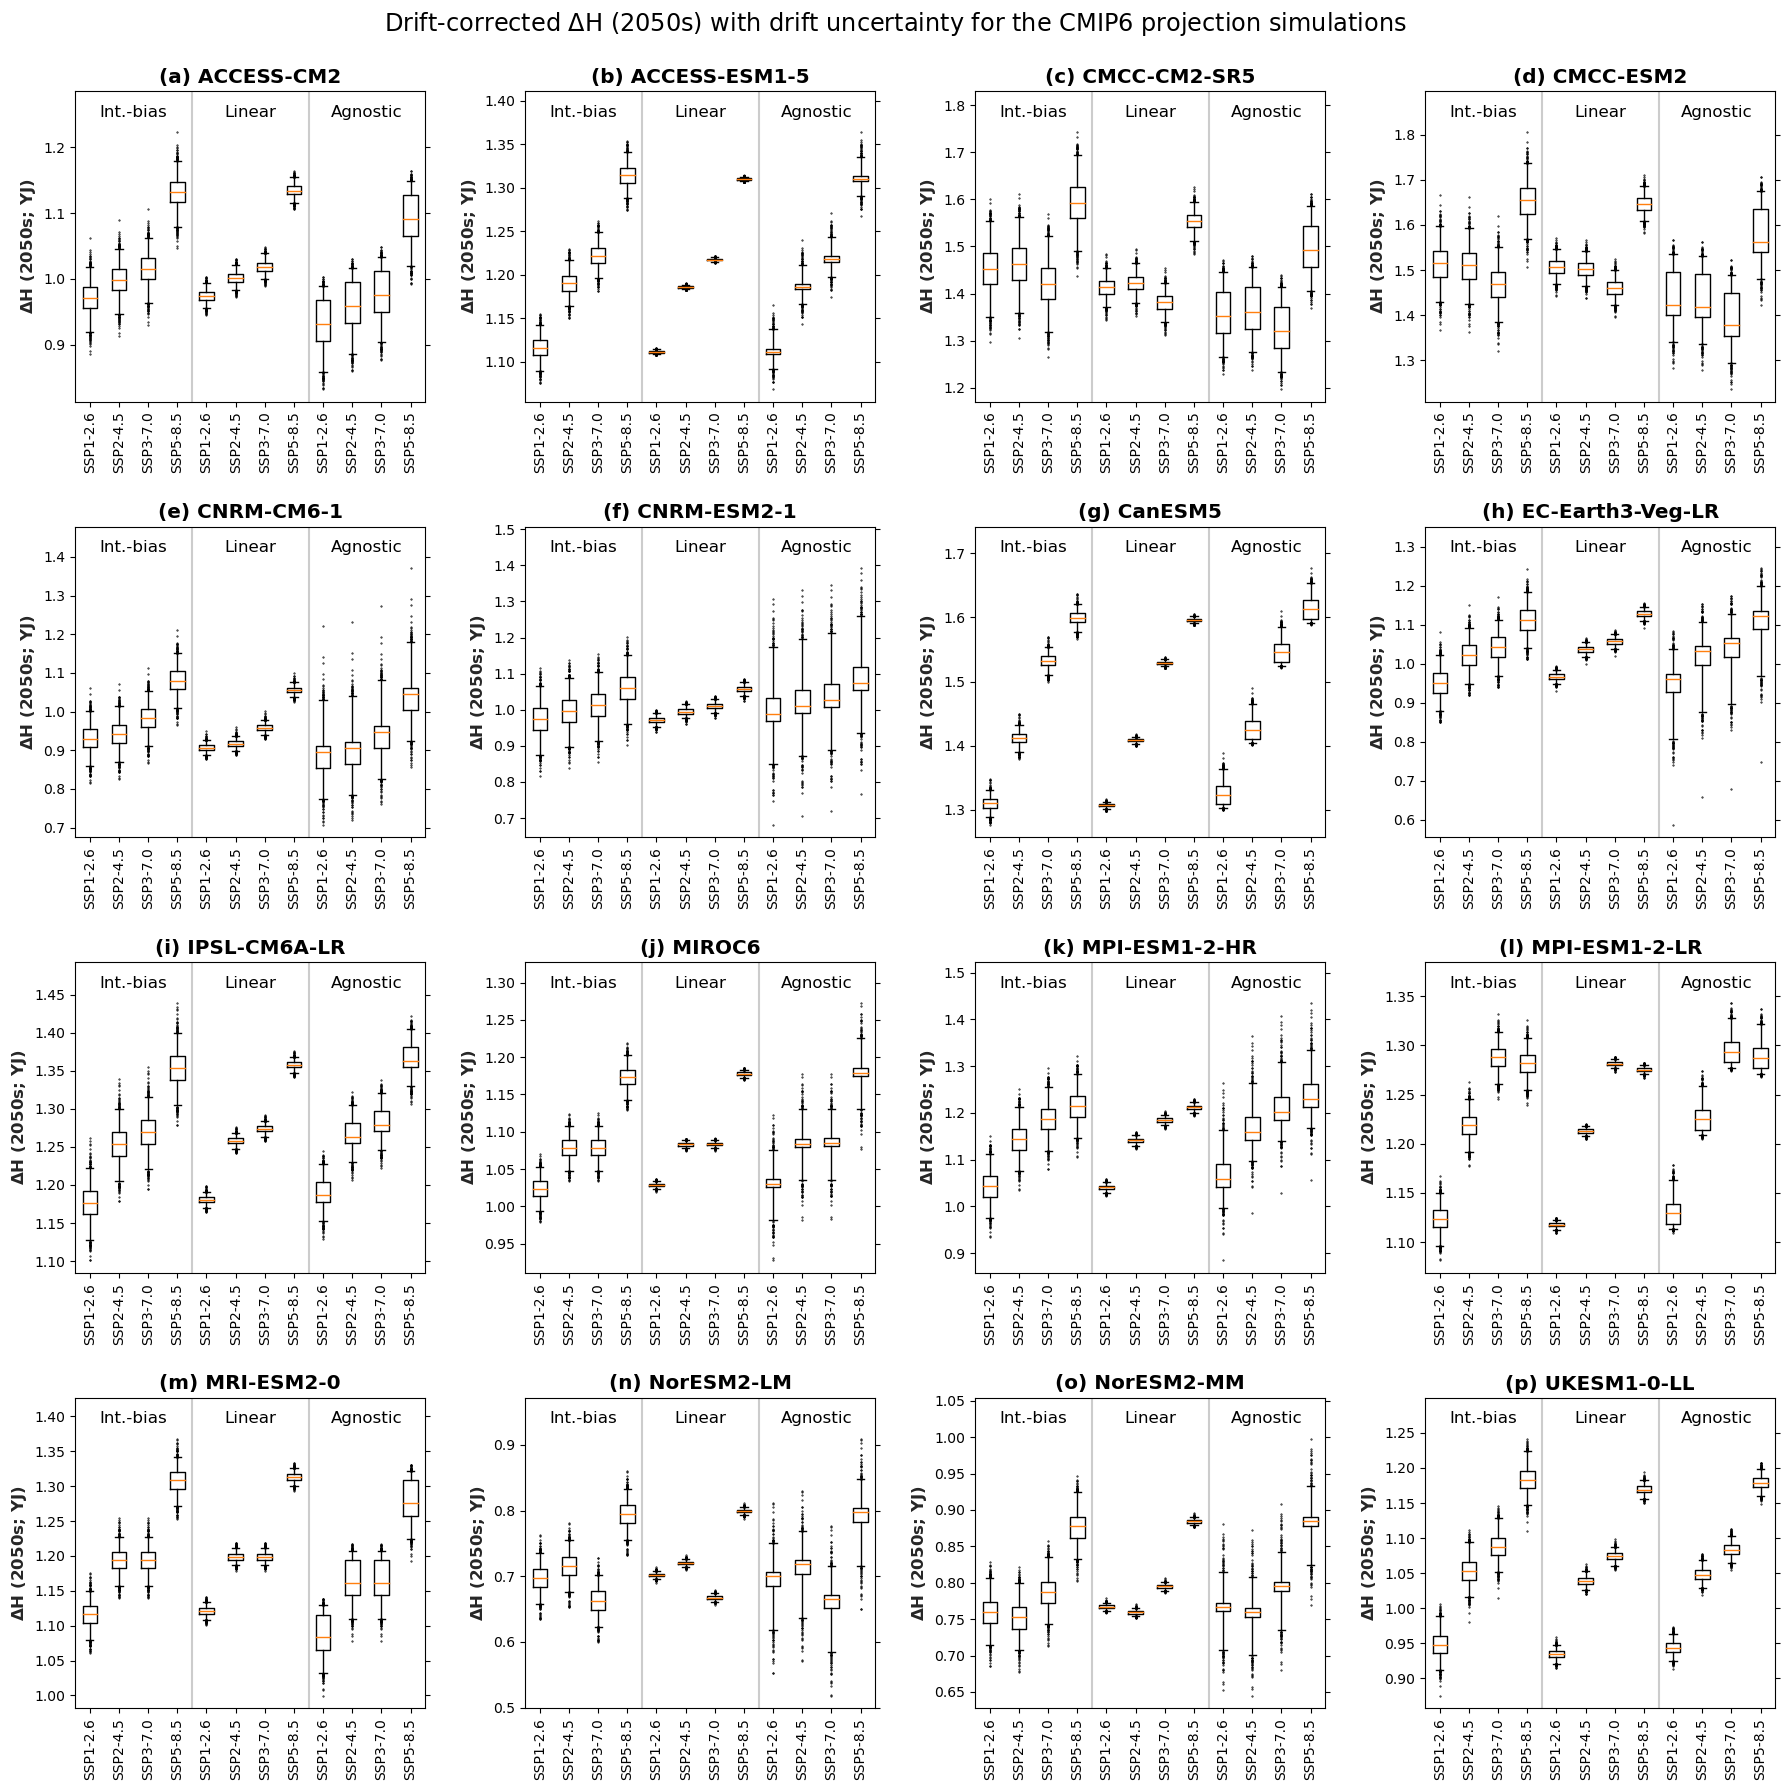

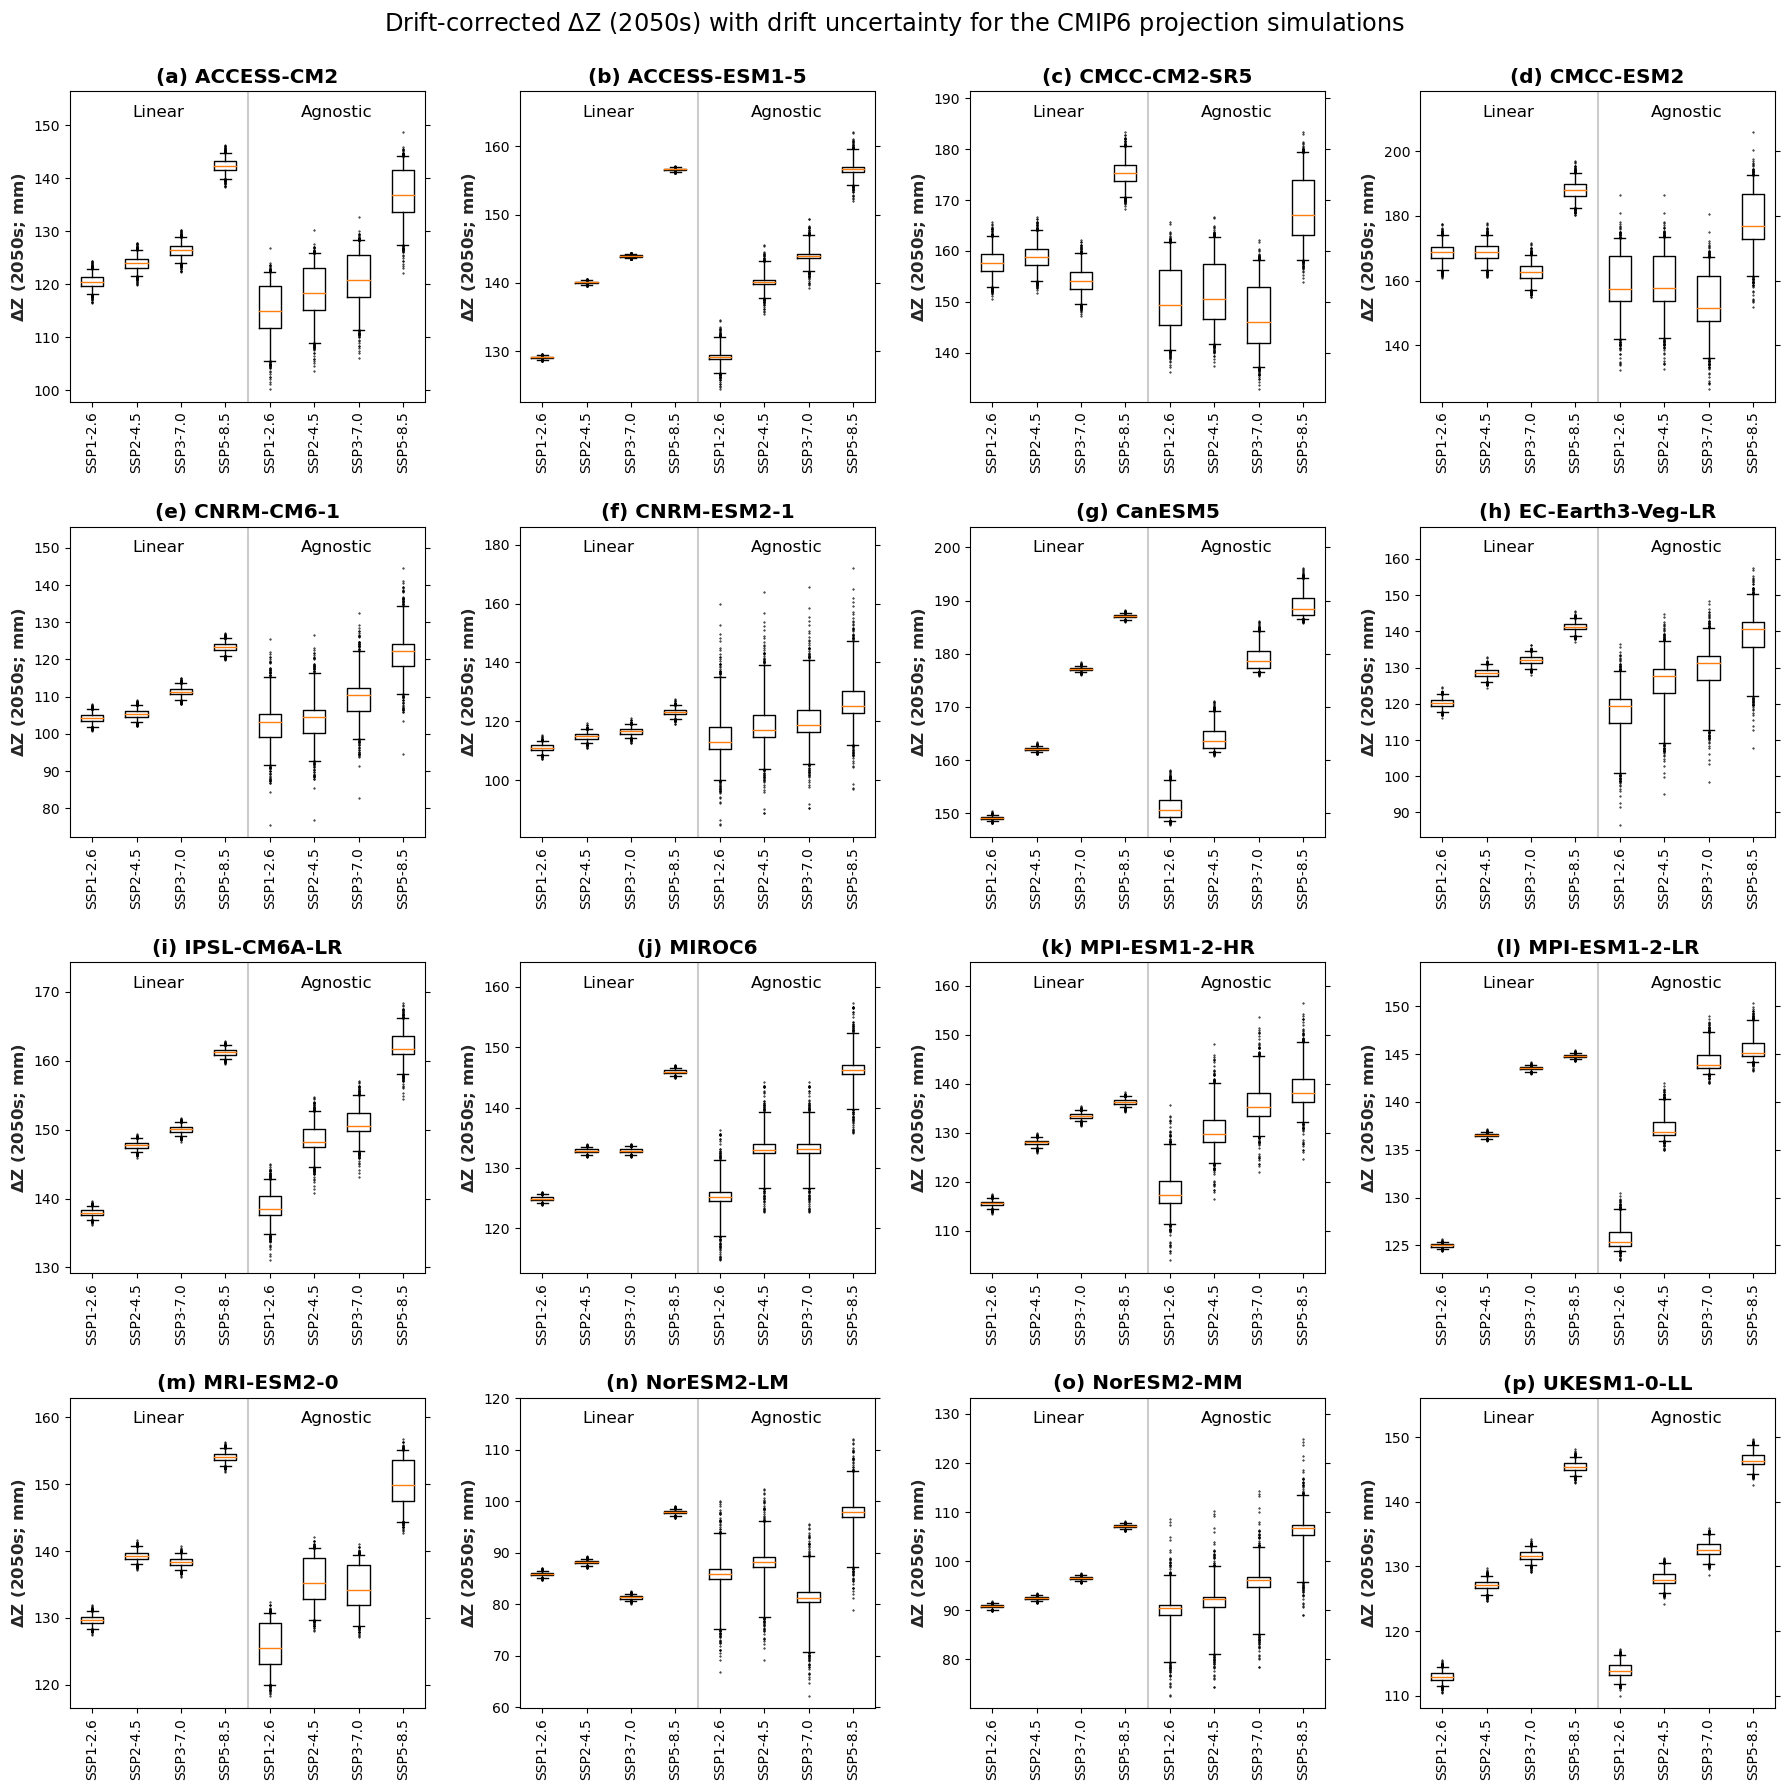

In [13]:
# Ensemble boxplots and detailed tables for E, H, and Z for 2050s
for variable in ['E', 'H', 'Z']:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade='2050s')
    _ = d22a.name_save_fig(fig, fso='s')
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade='2050s')
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade='2050s')
    print(f'{variable} (2050s)', detailed_df)

Written s06.pdf (0.26 MB)
Written s06.png (1.03 MB)
Written table_S05.tex
eta                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                   0.029  0.011    0.035               NaN    0.006
ACCESS-ESM1-5                0.014  0.002    0.014               NaN    0.013
CMCC-CM2-SR5                 0.070  0.029    0.060               NaN    0.079
CMCC-ESM2                    0.054  0.025    0.082               NaN    0.071
CNRM-CM6-1                   0.038  0.010    0.093               NaN    0.014
CNRM-ESM2-1                  0.050  0.010    0.147               NaN    0.014
CanESM5                      0.012  0.003    0.014               NaN    0.007
EC-Earth3-Veg-LR             0.060  0.014    0.154               NaN    0.007
IPSL-CM6A-LR                 0.032  0.007    0.028               NaN    0.024
MIROC6                       0.020  0.004    0.053              

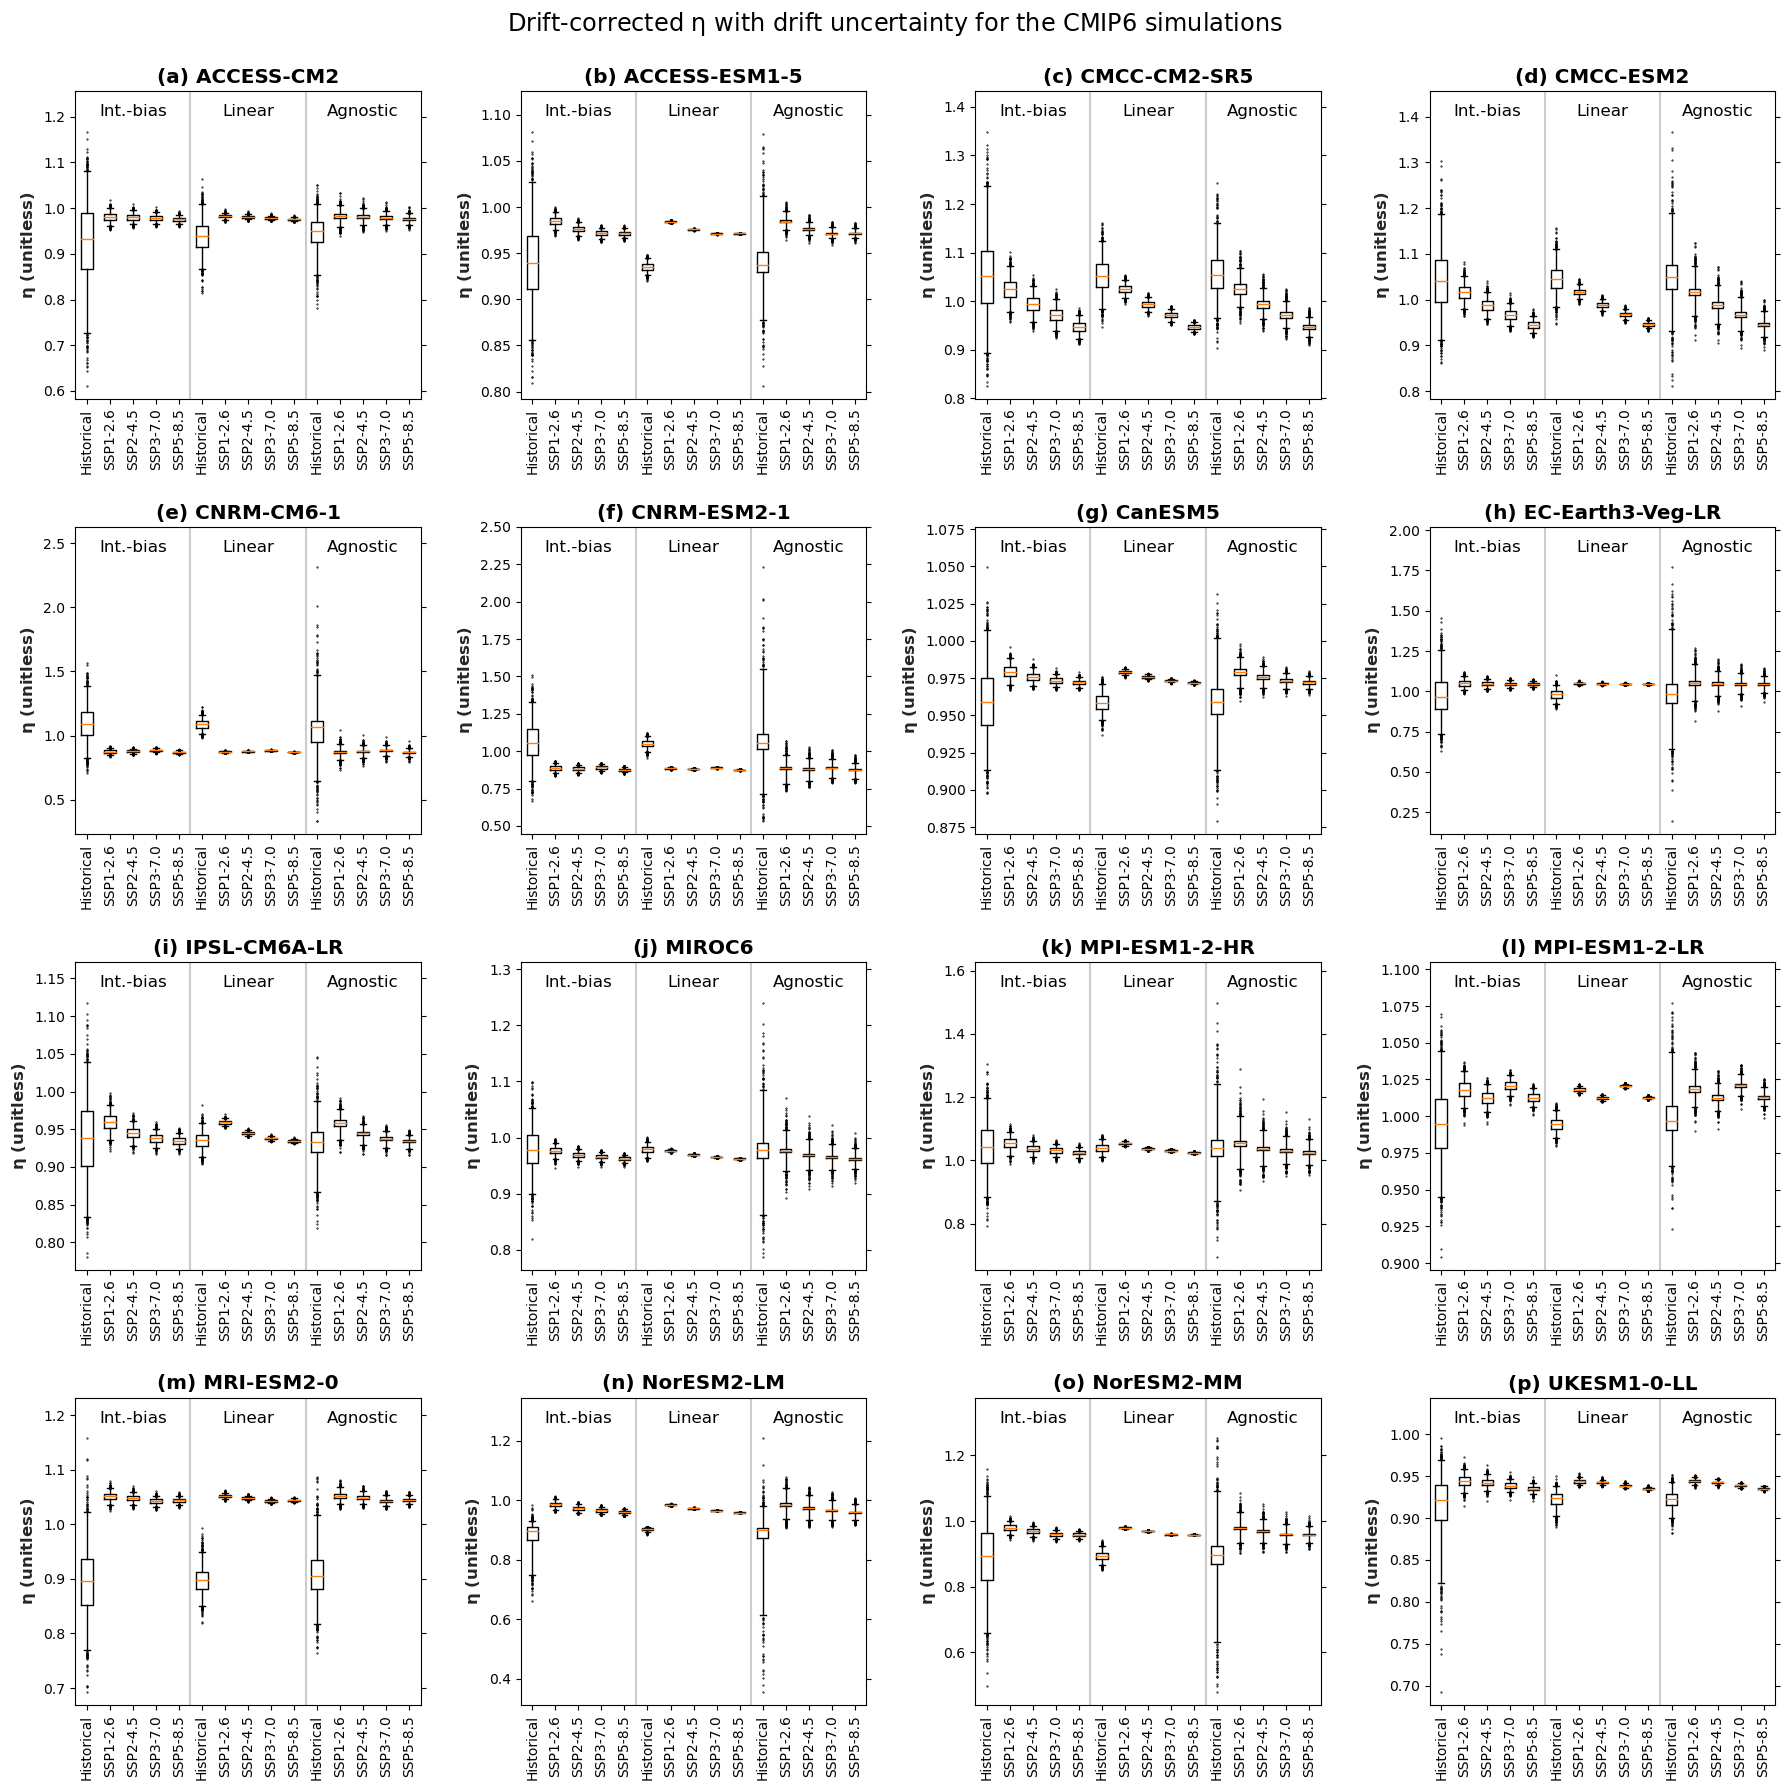

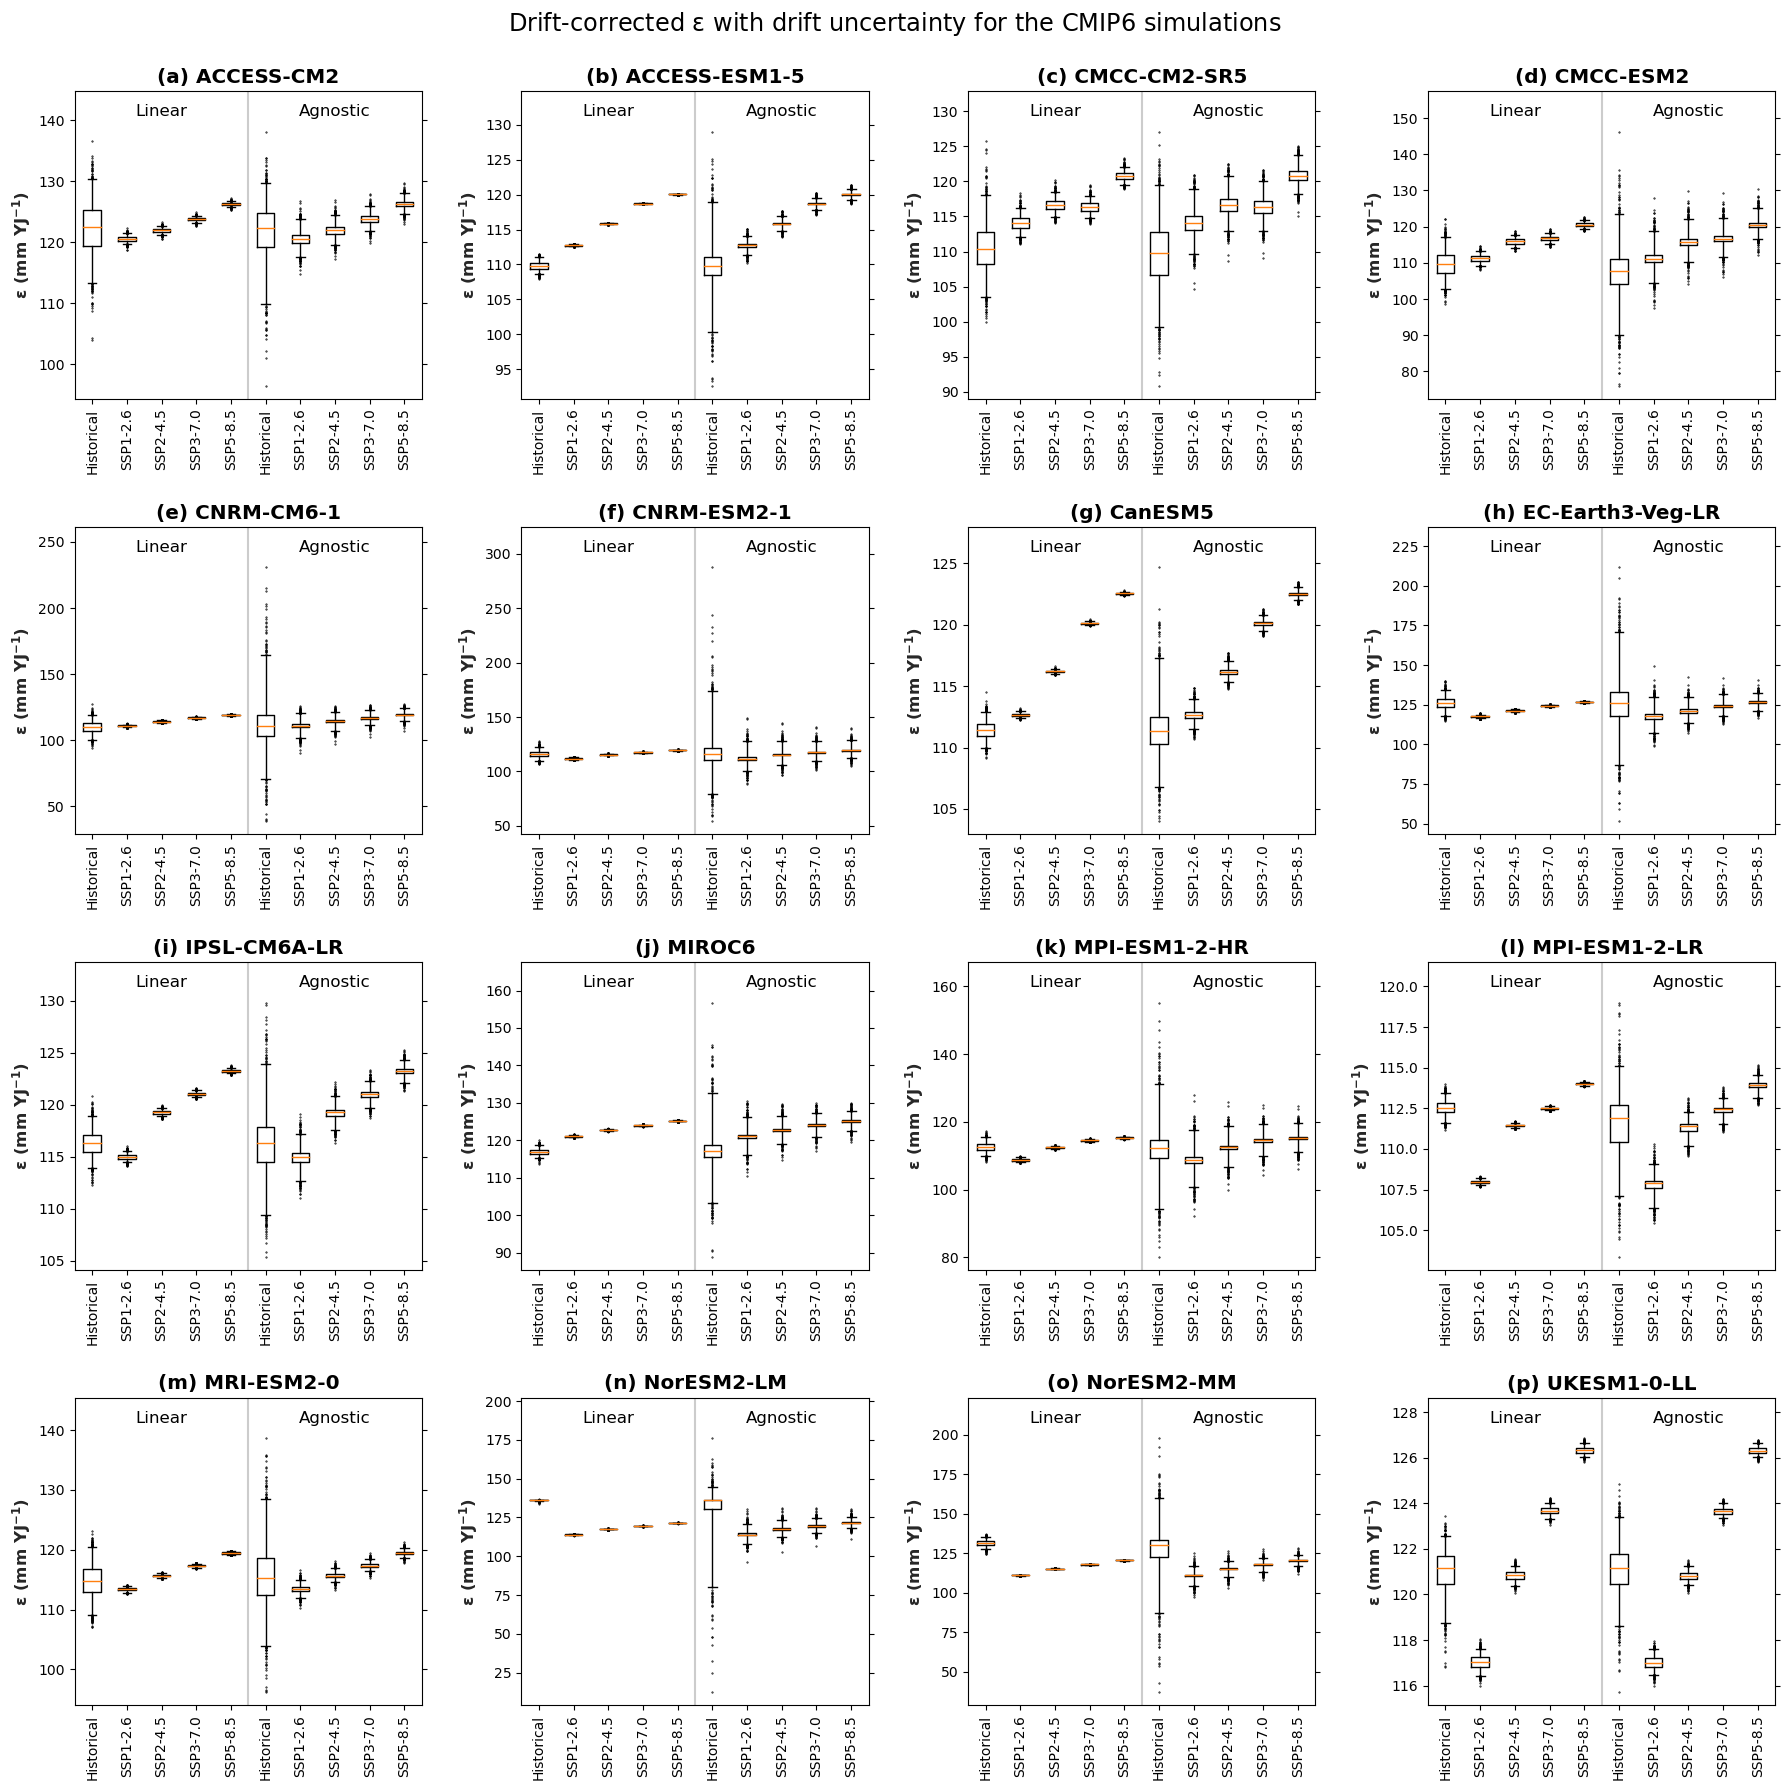

In [14]:
# Ensemble boxplots and detailed tables for eta, eps
for variable in ['eta', 'eps']:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade=None)
    _ = d22a.name_save_fig(fig, fso='s')
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade=None)
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade=None)
    print(f'{variable}', detailed_df)

In [15]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-17 16:53:26
End:       2023-07-17 16:59:18
Wall time: 351 s
